# Comparison of Different Classification Algorithms

## Loading modules

In [1]:
import pandas as pd
import numpy as np
% pylab inline
import operator
import re
from collections import OrderedDict
import seaborn as sns
import pickle
import os.path
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
from pylab import rcParams
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Setting some plot colors and parameters

In [2]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
# Adapted from http://spartanideas.msu.edu/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
cmap_set1 = ListedColormap(['#4daf4a', '#377eb8', '#e41a1c' ])

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
sns.set_style('ticks')

## Setting data frame display

In [3]:
pd.set_option('display.max_columns', None)

## Loading the data

We have acquired and merged the data in [this notebook](https://github.com/aajains/springboard-datascience-intensive/blob/master/capstone_project/DataAcquisitionMerging/data_acquisition_merging.ipynb). The merged data was also cleaned by fixing the missing values in [this notebook](https://github.com/aajains/springboard-datascience-intensive/blob/master/capstone_project/DataCleaning/data_cleaning.ipynb). A lot of features from the cleaned data was removed (or some features were selected) in [this notebook](https://github.com/aajains/springboard-datascience-intensive/blob/master/capstone_project/EDA/ExploratoryDataAnalysis_v1.ipynb). The resultant csv file is loaded below:

In [4]:
df = pd.read_csv("../Data/ExploredDataCleaned/FlightHistory_Weather_Jan2015-Dec2016_Top20Airports_Window60mins_ExploredCleaned.csv")

In [5]:
df.shape

(2857139, 69)

In [6]:
df.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,Carrier,Origin,Dest,Cancelled,Distance,Nflights_10,DepDelayMedian_10,DepDelayMax_10,ArrDelayMedian_10,ArrDelayMax_10,TaxiOutMedian_10,TaxiInMedian_10,Ncan_10,Ndiv_10,Nflights_20,DepDelayMedian_20,DepDelayMax_20,ArrDelayMedian_20,ArrDelayMax_20,TaxiOutMedian_20,TaxiInMedian_20,Ncan_20,Ndiv_20,Nflights_30,DepDelayMedian_30,DepDelayMax_30,ArrDelayMedian_30,ArrDelayMax_30,TaxiOutMedian_30,TaxiInMedian_30,Ncan_30,Ndiv_30,CRSDepHr,CRSArrHr,Temperature_Origin,DewPoint_Origin,Humidity_Origin,WindSpeed_Origin,WindDirection_Origin,Visibility_Origin,Pressure_Origin,Condition_Origin,Temperature_Dest,DewPoint_Dest,Humidity_Dest,WindSpeed_Dest,WindDirection_Dest,Visibility_Dest,Pressure_Dest,Condition_Dest,Month_Dest,DayOfMonth_Dest,DayOfWeek_Dest,TempFlight_30,TempFlight_20,TempFlight_10,AllCanceled_30,AllDiverted_30,AllCanceled_20,AllDiverted_20,AllCanDiv_20,AllCanDiv_30,AllCanceled_10,AllDiverted_10,AllCanDiv_10
0,0,1,1,4,AA,PHX,DFW,1.0,868.0,10,-2.0,0.0,-2.5,17.0,13.0,4.0,0.0,0.0,14,-2.0,0.0,-0.5,17.0,13.0,5.0,0.0,0.0,14,-2.0,0.0,-0.5,17.0,13.0,5.0,0.0,0.0,2,5,37.0,30.0,76.0,3.5,320.0,10.0,30.04,Scattered Clouds,33.1,27.0,78.0,8.1,350.0,10.0,30.34,Light Rain,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,4,NK,PHX,DFW,0.0,868.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,37.0,30.9,79.0,4.6,300.0,10.0,30.03,Mostly Cloudy,33.1,27.0,78.0,8.1,350.0,10.0,30.34,Light Rain,1,1,4,1,1,1,0,0,0,0,0,0,0,0,0
2,2,1,1,4,DL,DEN,ATL,0.0,1199.0,10,3.5,48.0,-7.5,52.0,15.0,6.5,0.0,0.0,12,3.5,48.0,-7.5,52.0,14.5,6.5,0.0,0.0,12,3.5,48.0,-7.5,52.0,14.5,6.5,0.0,0.0,0,5,7.0,-8.0,51.0,15.0,170.0,10.0,30.22,Clear,33.1,26.1,75.0,3.5,310.0,10.0,30.32,Partly Cloudy,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,1,4,NK,LAS,MSP,0.0,1299.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,34.0,17.1,50.0,9.2,190.0,10.0,29.99,Mostly Cloudy,16.0,10.0,77.0,8.1,240.0,10.0,29.90,Overcast,1,1,4,1,1,1,0,0,0,0,0,0,0,0,0
4,4,1,1,4,NK,LAS,DFW,0.0,1055.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,32.0,17.1,54.0,10.4,190.0,10.0,30.00,Mostly Cloudy,33.1,27.0,78.0,8.1,350.0,10.0,30.34,Light Rain,1,1,4,1,1,1,0,0,0,0,0,0,0,0,0


In [7]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [8]:
df.head()

,Month,DayofMonth,DayOfWeek,Carrier,Origin,Dest,Cancelled,Distance,Nflights_10,DepDelayMedian_10,DepDelayMax_10,ArrDelayMedian_10,ArrDelayMax_10,TaxiOutMedian_10,TaxiInMedian_10,Ncan_10,Ndiv_10,Nflights_20,DepDelayMedian_20,DepDelayMax_20,ArrDelayMedian_20,ArrDelayMax_20,TaxiOutMedian_20,TaxiInMedian_20,Ncan_20,Ndiv_20,Nflights_30,DepDelayMedian_30,DepDelayMax_30,ArrDelayMedian_30,ArrDelayMax_30,TaxiOutMedian_30,TaxiInMedian_30,Ncan_30,Ndiv_30,CRSDepHr,CRSArrHr,Temperature_Origin,DewPoint_Origin,Humidity_Origin,WindSpeed_Origin,WindDirection_Origin,Visibility_Origin,Pressure_Origin,Condition_Origin,Temperature_Dest,DewPoint_Dest,Humidity_Dest,WindSpeed_Dest,WindDirection_Dest,Visibility_Dest,Pressure_Dest,Condition_Dest,Month_Dest,DayOfMonth_Dest,DayOfWeek_Dest,TempFlight_30,TempFlight_20,TempFlight_10,AllCanceled_30,AllDiverted_30,AllCanceled_20,AllDiverted_20,AllCanDiv_20,AllCanDiv_30,AllCanceled_10,AllDiverted_10,AllCanDiv_10
0,1,1,4,AA,PHX,DFW,1.0,868.0,10,-2.0,0.0,-2.5,17.0,13.0,4.0,0.0,0.0,14,-2.0,0.0,-0.5,17.0,13.0,5.0,0.0,0.0,14,-2.0,0.0,-0.5,17.0,13.0,5.0,0.0,0.0,2,5,37.0,30.0,76.0,3.5,320.0,10.0,30.04,Scattered Clouds,33.1,27.0,78.0,8.1,350.0,10.0,30.34,Light Rain,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,4,NK,PHX,DFW,0.0,868.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,37.0,30.9,79.0,4.6,300.0,10.0,30.03,Mostly Cloudy,33.1,27.0,78.0,8.1,350.0,10.0,30.34,Light Rain,1,1,4,1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,4,DL,DEN,ATL,0.0,1199.0,10,3.5,48.0,-7.5,52.0,15.0,6.5,0.0,0.0,12,3.5,48.0,-7.5,52.0,14.5,6.5,0.0,0.0,12,3.5,48.0,-7.5,52.0,14.5,6.5,0.0,0.0,0,5,7.0,-8.0,51.0,15.0,170.0,10.0,30.22,Clear,33.1,26.1,75.0,3.5,310.0,10.0,30.32,Partly Cloudy,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,4,NK,LAS,MSP,0.0,1299.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,34.0,17.1,50.0,9.2,190.0,10.0,29.99,Mostly Cloudy,16.0,10.0,77.0,8.1,240.0,10.0,29.90,Overcast,1,1,4,1,1,1,0,0,0,0,0,0,0,0,0
4,1,1,4,NK,LAS,DFW,0.0,1055.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,32.0,17.1,54.0,10.4,190.0,10.0,30.00,Mostly Cloudy,33.1,27.0,78.0,8.1,350.0,10.0,30.34,Light Rain,1,1,4,1,1,1,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(2857139, 68)

There are some variables with numerical values and some variables with categories. For numerical variables, we do not have to worry about labelling. However, we will need to perform label encoding for the categorical variables. There are also some variables that are already in binary form, so that also does not need any labeling. Let's first identify all the numerical, categorical and binary variables.

In [10]:
numvar = ["Distance", "Nflights_10", "DepDelayMedian_10", "DepDelayMax_10", "ArrDelayMedian_10",
          "ArrDelayMax_10", "TaxiOutMedian_10", "TaxiInMedian_10", "Ncan_10", "Ndiv_10", "Nflights_20",
          "DepDelayMedian_20", "DepDelayMax_20", "ArrDelayMedian_20", "ArrDelayMax_20", "TaxiOutMedian_20",
          "TaxiInMedian_20", "Ncan_20", "Ndiv_20", "Nflights_30", "DepDelayMedian_30", "DepDelayMax_30", 
          "ArrDelayMedian_30", "ArrDelayMax_30", "TaxiOutMedian_30", "TaxiInMedian_30", "Ncan_30", 
          "Ndiv_30", "Temperature_Origin", "DewPoint_Origin", "Humidity_Origin", "WindSpeed_Origin", 
          "WindDirection_Origin", "Visibility_Origin", "Pressure_Origin", "Temperature_Dest", "DewPoint_Dest",
          "Humidity_Dest", "WindSpeed_Dest", "WindDirection_Dest", "Visibility_Dest", "Pressure_Dest"]
catvar = ["Month", "DayofMonth", "DayOfWeek", "Carrier", "Origin", "Dest", "CRSDepHr", "CRSArrHr", 
          "Condition_Origin", "Condition_Dest", "Month_Dest", "DayOfMonth_Dest", "DayOfWeek_Dest"]
binvar = ["TempFlight_30", "TempFlight_20", "TempFlight_10", "AllCanceled_30", "AllDiverted_30", 
          "AllCanceled_20", "AllDiverted_20", "AllCanDiv_20", "AllCanDiv_30", "AllCanceled_10", 
          "AllDiverted_10", "AllCanDiv_10"]

## Converting string values to numerical values in all categorical columns

In [11]:
#One-hot-encoding
for cvar in catvar:
    df = pd.concat([df, pd.get_dummies(df[cvar], prefix=cvar, dummy_na=False)], axis=1)
    df.drop([cvar], axis=1, inplace=True)

In [12]:
df.shape

(2857139, 331)

In [13]:
colnames = list(df.columns[1:])

## Creating feature matrix and target vector

In [14]:
X = df.drop(["Cancelled"], axis=1).values
y = df.Cancelled.astype(int).values

In [15]:
X.shape

(2857139, 330)

## Splitting the data into train (25%) and test (75%) sets

This split is only done to obtain optimum hyper parameters and to select best resampling techniques. Once obtained the best hyper parameters, we will then use 75% of the training data to do one more time cv.

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.75, random_state=20)
for train_index, test_index in sss1.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [17]:
X_train.shape

(714284, 330)

In [18]:
X_test.shape

(2142855, 330)

Just to make sure that stratified shuffle split led to train and test with same fraction of positive class, lets calculate the fractions.

In [19]:
sum(df.iloc[train_index].Cancelled == 1)/len(train_index)

0.011487027568866165

In [20]:
sum(df.iloc[test_index].Cancelled == 1)/len(test_index)

0.011486544819878153

They are indeed quite similar.

In [31]:
del X
del y
del X_test
del y_test

# Logistic Regression (class_weight="balanced")

In [21]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline as ppl

steps = [("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", LogisticRegression(random_state=40, class_weight="balanced"))]

pipe = ppl(steps)

# Parameters
param_grid = dict(model__C = [0.0001, 0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10],
                  model__penalty = ['l2']
                  )
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
LRbal = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=3,
                          scoring='average_precision',
                          iid=False)

LRbal.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] ............... model__C=0.0001, model__penalty=l2, total=  17.9s
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] ............... model__C=0.0001, model__penalty=l2, total=  22.0s
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] ............... model__C=0.0001, model__penalty=l2, total=  19.7s
[CV] model__C=0.001, model__penalty=l2 ...............................
[CV] ............... model__C=0.0001, model__penalty=l2, total=  12.7s
[CV] model__C=0.001, model__penalty=l2 ...............................
[CV] ............... model__C=0.0001, model__penalty=l2, total=  12.9s
[CV] model__C=0.001, model__penalty=l2 ...............................
[CV] ...........

[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  7.9min


[CV] .................. model__C=0.5, model__penalty=l2, total= 1.3min
[CV] model__C=0.5, model__penalty=l2 .................................
[CV] .................. model__C=0.5, model__penalty=l2, total= 1.3min
[CV] model__C=0.5, model__penalty=l2 .................................
[CV] .................. model__C=0.5, model__penalty=l2, total= 1.3min
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .................. model__C=0.5, model__penalty=l2, total= 1.5min
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .................. model__C=0.5, model__penalty=l2, total= 1.5min
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .................... model__C=1, model__penalty=l2, total= 1.8min
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .................... model__C=1, model__penalty=l2, total= 1.9min
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .

[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed: 27.6min finished


CPU times: user 5min 7s, sys: 6.45 s, total: 5min 13s
Wall time: 30min 19s


In [24]:
LRbal.best_params_

{'model__C': 10, 'model__penalty': 'l2'}

In [22]:
LRbal.best_score_

0.14130714062071961

In [25]:
LRbal.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.10602, std: 0.00659, params: {'model__C': 0.0001, 'model__penalty': 'l2'},
 mean: 0.12324, std: 0.00517, params: {'model__C': 0.001, 'model__penalty': 'l2'},
 mean: 0.13107, std: 0.00389, params: {'model__C': 0.01, 'model__penalty': 'l2'},
 mean: 0.13305, std: 0.00391, params: {'model__C': 0.02, 'model__penalty': 'l2'},
 mean: 0.13601, std: 0.00401, params: {'model__C': 0.05, 'model__penalty': 'l2'},
 mean: 0.13775, std: 0.00411, params: {'model__C': 0.1, 'model__penalty': 'l2'},
 mean: 0.13917, std: 0.00430, params: {'model__C': 0.2, 'model__penalty': 'l2'},
 mean: 0.14026, std: 0.00441, params: {'model__C': 0.5, 'model__penalty': 'l2'},
 mean: 0.14083, std: 0.00428, params: {'model__C': 1, 'model__penalty': 'l2'},
 mean: 0.14109, std: 0.00431, params: {'model__C': 2, 'model__penalty': 'l2'},
 mean: 0.14123, std: 0.00432, params: {'model__C': 5, 'model__penalty': 'l2'},
 mean: 0.14131, std: 0.00429, params: {'model__C': 10, 'model__penalty': 'l2'}]

# Logistic Regression (RUS)

In [26]:
%%time
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as pl
# Steps for pipeline
steps = [("rus", RandomUnderSampler(random_state=30)),
         ("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", LogisticRegression(random_state=40))]
pipe = pl(steps)

# Parameters
param_grid = dict(model__C = [0.0001, 0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10],
                  model__penalty = ['l2']
                  )
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
LRrus = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=3,
                          scoring='average_precision',
                          iid=False)
# Training using CV
LRrus.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] ............... model__C=0.0001, model__penalty=l2, total=   5.7s
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] ............... model__C=0.0001, model__penalty=l2, total=   6.5s
[CV] model__C=0.0001, model__penalty=l2 ..............................
[CV] ............... model__C=0.0001, model__penalty=l2, total=   7.7s
[CV] model__C=0.001, model__penalty=l2 ...............................
[CV] ............... model__C=0.0001, model__penalty=l2, total=   7.7s
[CV] model__C=0.001, model__penalty=l2 ...............................
[CV] ............... model__C=0.0001, model__penalty=l2, total=   7.3s
[CV] model__C=0.001, model__penalty=l2 ...............................
[CV] ...........

[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  2.0min


[CV] .................. model__C=0.5, model__penalty=l2, total=   7.6s
[CV] model__C=0.5, model__penalty=l2 .................................
[CV] .................. model__C=0.5, model__penalty=l2, total=   7.9s
[CV] model__C=0.5, model__penalty=l2 .................................
[CV] .................. model__C=0.5, model__penalty=l2, total=   9.1s
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .................. model__C=0.5, model__penalty=l2, total=   7.7s
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .................. model__C=0.5, model__penalty=l2, total=   8.5s
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .................... model__C=1, model__penalty=l2, total=   8.5s
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .................... model__C=1, model__penalty=l2, total=   7.2s
[CV] model__C=1, model__penalty=l2 ...................................
[CV] .

[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:  3.5min finished


CPU times: user 2min 25s, sys: 2.36 s, total: 2min 27s
Wall time: 3min 34s


In [27]:
LRrus.best_params_

{'model__C': 10, 'model__penalty': 'l2'}

In [28]:
LRrus.best_score_

0.14150500290719714

In [29]:
LRrus.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.09679, std: 0.00796, params: {'model__C': 0.0001, 'model__penalty': 'l2'},
 mean: 0.10424, std: 0.00781, params: {'model__C': 0.001, 'model__penalty': 'l2'},
 mean: 0.11943, std: 0.00738, params: {'model__C': 0.01, 'model__penalty': 'l2'},
 mean: 0.12360, std: 0.00742, params: {'model__C': 0.02, 'model__penalty': 'l2'},
 mean: 0.12704, std: 0.00755, params: {'model__C': 0.05, 'model__penalty': 'l2'},
 mean: 0.12834, std: 0.00753, params: {'model__C': 0.1, 'model__penalty': 'l2'},
 mean: 0.12948, std: 0.00736, params: {'model__C': 0.2, 'model__penalty': 'l2'},
 mean: 0.13185, std: 0.00708, params: {'model__C': 0.5, 'model__penalty': 'l2'},
 mean: 0.13428, std: 0.00691, params: {'model__C': 1, 'model__penalty': 'l2'},
 mean: 0.13691, std: 0.00676, params: {'model__C': 2, 'model__penalty': 'l2'},
 mean: 0.14002, std: 0.00661, params: {'model__C': 5, 'model__penalty': 'l2'},
 mean: 0.14151, std: 0.00671, params: {'model__C': 10, 'model__penalty': 'l2'}]

# Logistic Regression (SMOTE)

In [33]:
%%time
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pl
# Steps for pipeline
steps = [("smote", SMOTE(random_state=30, kind='regular')),
         ("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", LogisticRegression(random_state=40))]
pipe = pl(steps)

# Parameters
param_grid = dict(model__C = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                  model__penalty = ['l2'],
                  smote__k_neighbors = [5, 3, 1],
                  smote__m_neighbors = [12, 10, 6]
                  )
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
LRsmote = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=3,
                          scoring='average_precision',
                          iid=False)
# Training using CV
LRsmote.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] model__C=0.001, model__penalty=l2, smote__k_neighbors=5, smote__m_neighbors=12 
[CV] model__C=0.001, model__penalty=l2, smote__k_neighbors=5, smote__m_neighbors=12 
[CV] model__C=0.001, model__penalty=l2, smote__k_neighbors=5, smote__m_neighbors=12 
[CV]  model__C=0.001, model__penalty=l2, smote__k_neighbors=5, smote__m_neighbors=12, total= 1.0min
[CV] model__C=0.001, model__penalty=l2, smote__k_neighbors=5, smote__m_neighbors=12 
[CV]  model__C=0.001, model__penalty=l2, smote__k_neighbors=5, smote__m_neighbors=12, total= 1.1min
[CV]  model__C=0.001, model__penalty=l2, smote__k_neighbors=5, smote__m_neighbors=12, total= 1.1min
[CV] model__C=0.001, model__penalty=l2, smote__k_neighbors=5, smote__m_neighbors=12 
[CV] model__C=0.001, model__penalty=l2, smote__k_neighbors=5, smote__m_neighbors=10 
[CV]  model__C=0.001, model__penalty=l2, smote__k_neighbors=5, smote__m_neighbors=12, total= 1.1min
[CV] model__C=0.001, model__

[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 13.7min


[CV] model__C=0.001, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10 
[CV]  model__C=0.001, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10, total= 1.1min
[CV] model__C=0.001, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10 
[CV]  model__C=0.001, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10, total= 1.1min
[CV]  model__C=0.001, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10, total= 1.1min
[CV] model__C=0.001, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=6 
[CV] model__C=0.001, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=6 
[CV]  model__C=0.001, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10, total= 1.1min
[CV] model__C=0.001, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=6 
[CV]  model__C=0.001, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=6, total= 1.1min
[CV] model__C=0.001, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbor

[CV] model__C=0.01, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10 
[CV]  model__C=0.01, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10, total= 1.4min
[CV] model__C=0.01, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10 
[CV]  model__C=0.01, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10, total= 1.3min
[CV] model__C=0.01, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=6 
[CV]  model__C=0.01, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10, total= 1.3min
[CV] model__C=0.01, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=6 
[CV]  model__C=0.01, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10, total= 1.3min
[CV] model__C=0.01, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=6 
[CV]  model__C=0.01, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=6, total= 1.4min
[CV] model__C=0.01, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=6 
[CV]  

[CV] model__C=0.05, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10 
[CV]  model__C=0.05, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10, total= 1.8min
[CV] model__C=0.05, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10 
[CV]  model__C=0.05, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10, total= 1.9min
[CV] model__C=0.05, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=6 
[CV]  model__C=0.05, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10, total= 1.9min
[CV] model__C=0.05, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=6 
[CV]  model__C=0.05, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=10, total= 1.9min
[CV] model__C=0.05, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=6 
[CV]  model__C=0.05, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=6, total= 1.9min
[CV]  model__C=0.05, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=6, total

[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed: 83.1min


[CV]  model__C=0.1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=10, total= 2.1min
[CV] model__C=0.1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=10 
[CV]  model__C=0.1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=10, total= 2.0min
[CV] model__C=0.1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=0.1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=10, total= 2.1min
[CV] model__C=0.1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=0.1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=10, total= 2.0min
[CV] model__C=0.1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=0.1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 2.1min
[CV]  model__C=0.1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 2.1min
[CV] model__C=0.1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV

[CV] model__C=0.5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=10 
[CV]  model__C=0.5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=10, total= 3.0min
[CV] model__C=0.5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=0.5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=10, total= 3.0min
[CV] model__C=0.5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=0.5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=10, total= 2.4min
[CV] model__C=0.5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=0.5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 2.5min
[CV] model__C=0.5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=0.5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 3.0min
[CV] model__C=0.5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=0.5,

[CV] model__C=1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=10, total= 3.1min
[CV] model__C=1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=10, total= 3.4min
[CV] model__C=1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 3.3min
[CV] model__C=1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 3.3min
[CV] model__C=1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=1, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 3.3min
[CV] model__C=1, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=12 
[CV]  model__C=1, model__penalty=l2, smote

[CV] model__C=5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 4.6min
[CV] model__C=5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 5.8min
[CV] model__C=5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 5.3min
[CV] model__C=5, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=12 
[CV]  model__C=5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 4.6min
[CV] model__C=5, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=12 
[CV]  model__C=5, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 5.5min
[CV] model__C=5, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=12 
[CV]  model__C=5, model__penalty=l2, smote

[CV]  model__C=10, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 4.6min
[CV] model__C=10, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6 
[CV]  model__C=10, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 5.7min
[CV] model__C=10, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=12 
[CV]  model__C=10, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 4.7min
[CV] model__C=10, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=12 
[CV]  model__C=10, model__penalty=l2, smote__k_neighbors=3, smote__m_neighbors=6, total= 6.2min
[CV] model__C=10, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=12 
[CV]  model__C=10, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=12, total= 5.2min
[CV] model__C=10, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=12 
[CV]  model__C=10, model__penalty=l2, smote__k_neighbors=1, smote__m_neighbors=12, total= 6.0min
[CV] model__C

[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed: 346.3min finished


CPU times: user 19min 15s, sys: 5min 49s, total: 25min 4s
Wall time: 5h 50min 28s


In [34]:
LRsmote.best_params_

{'model__C': 10,
 'model__penalty': 'l2',
 'smote__k_neighbors': 5,
 'smote__m_neighbors': 12}

In [35]:
LRsmote.best_score_

0.1551249906241764

In [36]:
LRsmote.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.12995, std: 0.00471, params: {'model__C': 0.001, 'model__penalty': 'l2', 'smote__k_neighbors': 5, 'smote__m_neighbors': 12},
 mean: 0.12995, std: 0.00471, params: {'model__C': 0.001, 'model__penalty': 'l2', 'smote__k_neighbors': 5, 'smote__m_neighbors': 10},
 mean: 0.12995, std: 0.00471, params: {'model__C': 0.001, 'model__penalty': 'l2', 'smote__k_neighbors': 5, 'smote__m_neighbors': 6},
 mean: 0.12977, std: 0.00472, params: {'model__C': 0.001, 'model__penalty': 'l2', 'smote__k_neighbors': 3, 'smote__m_neighbors': 12},
 mean: 0.12977, std: 0.00472, params: {'model__C': 0.001, 'model__penalty': 'l2', 'smote__k_neighbors': 3, 'smote__m_neighbors': 10},
 mean: 0.12977, std: 0.00472, params: {'model__C': 0.001, 'model__penalty': 'l2', 'smote__k_neighbors': 3, 'smote__m_neighbors': 6},
 mean: 0.12778, std: 0.00473, params: {'model__C': 0.001, 'model__penalty': 'l2', 'smote__k_neighbors': 1, 'smote__m_neighbors': 12},
 mean: 0.12778, std: 0.00473, params: {'model__C': 0.001, 'model

Lets go ahead and pickle the LR models.

In [37]:
import dill
dill.dump(LRbal, open('LogisticRegression_bal.pkl', 'wb'))

In [38]:
dill.dump(LRsmote, open('LogisticRegression_smote.pkl', 'wb'))

# Gaussian Naive Bayes (RUS)

In [22]:
%%time
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline as pl
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Steps for pipeline
steps = [("rus", RandomUnderSampler(random_state=30)),
         ("scaler", MinMaxScaler(feature_range=(0,1))), # though not needed
         ("model", GaussianNB())]

pipe = pl(steps)

# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

param_grid = dict(rus__ratio=["auto"])

# Setting up the grid search
GNBrus = GridSearchCV(pipe, param_grid = param_grid,
                           verbose = 2,
                           cv = cv,
                          n_jobs=3,
                          scoring='average_precision',
                          iid=False)
# Training using CV
GNBrus.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] rus__ratio=auto .................................................
[CV] rus__ratio=auto .................................................
[CV] rus__ratio=auto .................................................
[CV] .................................. rus__ratio=auto, total=  11.7s
[CV] rus__ratio=auto .................................................
[CV] .................................. rus__ratio=auto, total=  12.0s
[CV] rus__ratio=auto .................................................
[CV] .................................. rus__ratio=auto, total=  15.0s


[Parallel(n_jobs=3)]: Done   3 out of   5 | elapsed:   39.3s remaining:   26.2s


[CV] .................................. rus__ratio=auto, total=   7.3s
[CV] .................................. rus__ratio=auto, total=   7.3s


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   56.3s finished


CPU times: user 14.9 s, sys: 4.08 s, total: 19 s
Wall time: 1min


In [23]:
GNBrus.best_score_

0.15750175534260644

In [24]:
GNBrus.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.15750, std: 0.01162, params: {'rus__ratio': 'auto'}]

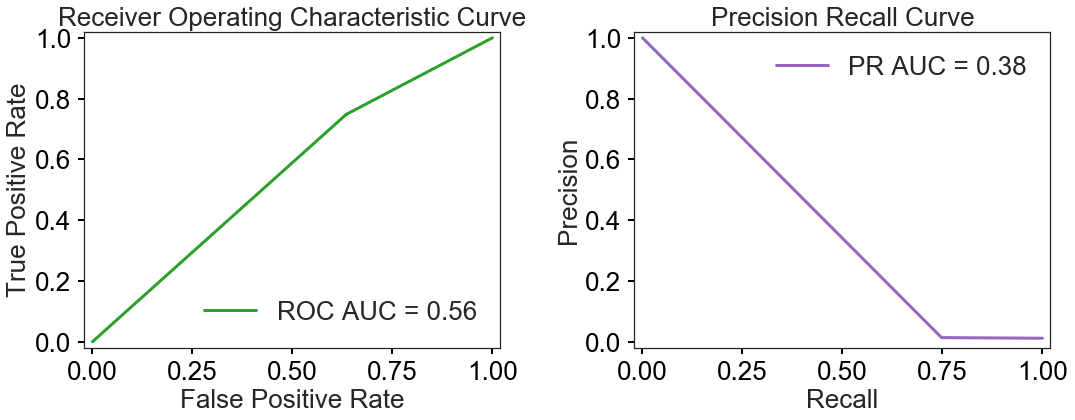

In [27]:
plots(GNBrus.best_estimator_.steps[-1][1], X_test, y_test, outputfile='GNB_rus.pdf')

# Gaussian Naive Bayes (SMOTE)

In [31]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pl

# Steps for pipeline
steps = [("smote", SMOTE(random_state=30)),
         ("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", GaussianNB())]

pipe = pl(steps)

# Parameters
param_grid = dict(smote__kind = ['regular', 'borderline1', 'borderline2'],
                 smote__k_neighbors = [5, 3, 1],
                 smote__m_neighbors = [12, 10, 6])
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
GNBsmote = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 3,
                           cv = cv,
                          n_jobs=3,
                          scoring='average_precision',
                          iid=False)
# Training using CV
GNBsmote.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12 
[CV] smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12 
[CV] smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12 
[CV]  smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12, score=0.476170, total= 1.2min
[CV] smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12 
[CV]  smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12, score=0.478751, total= 1.2min
[CV] smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12 
[CV]  smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12, score=0.469110, total= 1.2min
[CV] smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=10 
[CV]  smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12, score=0.479918, total= 1.3min
[CV]  smote__k_neighbors=5, smote__kind=regular, smote__m_neighbors=12, score=0.489221, total= 1.3min
[C

[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 16.5min


[CV] smote__k_neighbors=5, smote__kind=borderline1, smote__m_neighbors=6 
[CV]  smote__k_neighbors=5, smote__kind=borderline1, smote__m_neighbors=6, score=0.421126, total= 1.7min
[CV] smote__k_neighbors=5, smote__kind=borderline1, smote__m_neighbors=6 
[CV]  smote__k_neighbors=5, smote__kind=borderline1, smote__m_neighbors=6, score=0.420394, total= 1.5min
[CV] smote__k_neighbors=5, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=5, smote__kind=borderline1, smote__m_neighbors=6, score=0.427335, total= 1.4min
[CV] smote__k_neighbors=5, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=5, smote__kind=borderline1, smote__m_neighbors=6, score=0.429362, total= 1.7min
[CV] smote__k_neighbors=5, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=5, smote__kind=borderline2, smote__m_neighbors=12, score=0.415579, total= 1.6min
[CV] smote__k_neighbors=5, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=5

[CV]  smote__k_neighbors=3, smote__kind=borderline1, smote__m_neighbors=6, score=0.424540, total= 1.7min
[CV] smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=3, smote__kind=borderline1, smote__m_neighbors=6, score=0.431413, total= 1.9min
[CV] smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=3, smote__kind=borderline1, smote__m_neighbors=6, score=0.428515, total= 1.8min
[CV] smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12, score=0.421702, total= 1.8min
[CV] smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12, score=0.417435, total= 1.9min
[CV] smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=3, smote__kind=borderline2, smote__m_neighbors=12, score=0.407362, total=

[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=1, smote__kind=borderline1, smote__m_neighbors=6, score=0.427848, total= 2.0min
[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12, score=0.421398, total= 2.2min
[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12 
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12, score=0.432367, total= 2.3min
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12, score=0.427712, total= 2.2min


[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed: 74.4min


[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12 
[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10 
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12, score=0.439365, total= 1.9min
[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10 
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=12, score=0.450784, total= 2.1min
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10, score=0.415551, total= 2.1min
[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10 
[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10 
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10, score=0.434623, total= 2.0min
[CV] smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10 
[CV]  smote__k_neighbors=1, smote__kind=borderline2, smote__m_neighbors=10, score=0.428230, total= 2.1min
[CV] smote__k_neighb

[Parallel(n_jobs=3)]: Done 135 out of 135 | elapsed: 83.7min finished


CPU times: user 5min 58s, sys: 2min 29s, total: 8min 27s
Wall time: 1h 24min 8s


In [33]:
GNBsmote.best_params_

{'smote__k_neighbors': 5, 'smote__kind': 'regular', 'smote__m_neighbors': 12}

In [34]:
GNBsmote.best_score_

0.47863394585347885

In [36]:
GNBsmote.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.47863, std: 0.00649, params: {'smote__k_neighbors': 5, 'smote__kind': 'regular', 'smote__m_neighbors': 12},
 mean: 0.47863, std: 0.00649, params: {'smote__k_neighbors': 5, 'smote__kind': 'regular', 'smote__m_neighbors': 10},
 mean: 0.47863, std: 0.00649, params: {'smote__k_neighbors': 5, 'smote__kind': 'regular', 'smote__m_neighbors': 6},
 mean: 0.43507, std: 0.00502, params: {'smote__k_neighbors': 5, 'smote__kind': 'borderline1', 'smote__m_neighbors': 12},
 mean: 0.43282, std: 0.00264, params: {'smote__k_neighbors': 5, 'smote__kind': 'borderline1', 'smote__m_neighbors': 10},
 mean: 0.42454, std: 0.00346, params: {'smote__k_neighbors': 5, 'smote__kind': 'borderline1', 'smote__m_neighbors': 6},
 mean: 0.41643, std: 0.01266, params: {'smote__k_neighbors': 5, 'smote__kind': 'borderline2', 'smote__m_neighbors': 12},
 mean: 0.41572, std: 0.00911, params: {'smote__k_neighbors': 5, 'smote__kind': 'borderline2', 'smote__m_neighbors': 10},
 mean: 0.41198, std: 0.01038, params: {'smote_

In [38]:
import dill
dill.dump(GNBrus, open('GNBrus.pkl', 'wb'))

In [39]:
import dill
dill.dump(GNBsmote, open('GNBsmote.pkl', 'wb'))

# Random Forest (class_weight="balanced")

In [42]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline as ppl
# Steps for pipeline
steps = [("model", RandomForestClassifier(random_state=40))]
pipe = ppl(steps)

# Parameters
param_grid = dict(model__n_estimators = [100],
                  model__max_features = ['sqrt', 'log2'],
                  model__min_samples_leaf = [1, 2, 3, 4, 5, 10],
                  model__class_weight = ['balanced']
                  )
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
RFbal = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=3,
                          scoring='average_precision',
                          iid=False)
# Training using CV
RFbal.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, total= 5.8min
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, total= 5.9min
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, tota

[CV] model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100 
[CV]  model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=1, model__n_estimators=100, total= 3.4min
[CV] model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100 
[CV]  model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=1, model__n_estimators=100, total= 3.5min
[CV] model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100 


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 68.1min


[CV]  model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, total= 3.5min
[CV] model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100 
[CV]  model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, total= 3.4min
[CV] model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100 
[CV]  model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, total= 3.5min
[CV] model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=3, model__n_estimators=100 
[CV]  model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, total= 3.5min
[CV] model__class_weight=balanced, model__max_features=log2, model__min_samples_leaf=3, model__n_estimators=100 
[CV]  model__class_weight=balanced, 

[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed: 98.6min finished


CPU times: user 7min 53s, sys: 13 s, total: 8min 6s
Wall time: 1h 44min 2s


In [46]:
RFbal.best_params_

{'model__class_weight': 'balanced',
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 2,
 'model__n_estimators': 100}

In [47]:
RFbal.best_score_

0.31499838891129767

In [48]:
RFbal.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.30918, std: 0.00719, params: {'model__class_weight': 'balanced', 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 100},
 mean: 0.31500, std: 0.01046, params: {'model__class_weight': 'balanced', 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__n_estimators': 100},
 mean: 0.31091, std: 0.01160, params: {'model__class_weight': 'balanced', 'model__max_features': 'sqrt', 'model__min_samples_leaf': 3, 'model__n_estimators': 100},
 mean: 0.30960, std: 0.00910, params: {'model__class_weight': 'balanced', 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__n_estimators': 100},
 mean: 0.30706, std: 0.00957, params: {'model__class_weight': 'balanced', 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__n_estimators': 100},
 mean: 0.29447, std: 0.01024, params: {'model__class_weight': 'balanced', 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__n_estimators': 100},
 mean: 0.30872,

# Random Forest (SMOTE)

In [41]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pl

# Steps for pipeline
steps = [("smote", SMOTE(random_state=30, kind='regular')),
         ("model", RandomForestClassifier(random_state=40))]

pipe = pl(steps)

# Parameters
param_grid = dict(model__n_estimators = [100],
                  model__max_features = ['sqrt', 'log2'],
                  model__min_samples_leaf = [1, 2, 3, 4, 5],
                  smote__k_neighbors = [5, 3],
                  smote__m_neighbors = [12, 10]
                  )
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
RFsmote = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=3,
                          scoring='average_precision',
                          iid=False)
# Training using CV
RFsmote.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=12 
[CV] model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=12 
[CV] model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=12 
[CV]  model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=12, total=19.6min
[CV]  model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=12, total=19.6min
[CV] model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=12 
[CV] model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=12 
[CV]  model_

[CV]  model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10, total=19.2min
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=12 
[CV]  model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=12, total=19.4min
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=12 
[CV]  model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=12, total=19.0min
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=12 
[CV]  model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=12, total=20.1min
[CV] model__max_features=sqrt, model__min_sa

[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 241.2min


[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10 
[CV]  model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10, total=19.6min
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10 
[CV]  model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10, total=19.0min
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10 
[CV]  model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10, total=19.6min
[CV] model__max_features=sqrt, model__min_samples_leaf=3, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=12 
[CV]  model__max_features=sqrt, model__min_samples_leaf=2, 

[CV]  model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10, total=19.2min
[CV] model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10 
[CV]  model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10, total=19.2min
[CV] model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10 
[CV]  model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10, total=19.3min
[CV] model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=12 
[CV]  model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10, total=19.5min
[CV] model__max_features=sqrt, model__min_sa

[CV] model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10 
[CV]  model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10, total=19.9min
[CV] model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10 
[CV]  model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10, total=19.5min
[CV] model__max_features=log2, model__min_samples_leaf=1, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=12 
[CV]  model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10, total=20.4min
[CV] model__max_features=log2, model__min_samples_leaf=1, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=12 
[CV]  model__max_features=log2, model__min_samples_leaf=1, 

[CV]  model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10, total=12.2min
[CV] model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10 
[CV]  model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10, total=12.0min
[CV] model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=12 
[CV]  model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10, total=11.9min
[CV] model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=12 
[CV]  model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10, total=12.0min
[CV] model__max_features=log2, model__min_sa

[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed: 899.5min


[CV] model__max_features=log2, model__min_samples_leaf=3, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10 
[CV]  model__max_features=log2, model__min_samples_leaf=3, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10, total=12.2min
[CV] model__max_features=log2, model__min_samples_leaf=3, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10 
[CV]  model__max_features=log2, model__min_samples_leaf=3, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10, total=12.5min
[CV] model__max_features=log2, model__min_samples_leaf=4, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=12 
[CV]  model__max_features=log2, model__min_samples_leaf=3, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=10, total=12.2min
[CV] model__max_features=log2, model__min_samples_leaf=4, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=12 
[CV]  model__max_features=log2, model__min_samples_leaf=3, 

[CV]  model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10, total=12.4min
[CV] model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10 
[CV]  model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10, total=12.9min
[CV] model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=12 
[CV]  model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10, total=12.7min
[CV] model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=100, smote__k_neighbors=3, smote__m_neighbors=12 
[CV]  model__max_features=log2, model__min_samples_leaf=5, model__n_estimators=100, smote__k_neighbors=5, smote__m_neighbors=10, total=13.0min
[CV] model__max_features=log2, model__min_sa

[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed: 1087.1min finished


CPU times: user 28min 20s, sys: 4min 45s, total: 33min 5s
Wall time: 18h 26min 21s


In [43]:
RFsmote.best_params_

{'model__max_features': 'sqrt',
 'model__min_samples_leaf': 2,
 'model__n_estimators': 100,
 'smote__k_neighbors': 5,
 'smote__m_neighbors': 12}

In [44]:
RFsmote.best_score_

0.32224181166590465

In [45]:
RFsmote.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.32107, std: 0.00974, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 100, 'smote__k_neighbors': 5, 'smote__m_neighbors': 12},
 mean: 0.32107, std: 0.00974, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 100, 'smote__k_neighbors': 5, 'smote__m_neighbors': 10},
 mean: 0.32170, std: 0.00873, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 100, 'smote__k_neighbors': 3, 'smote__m_neighbors': 12},
 mean: 0.32170, std: 0.00873, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 100, 'smote__k_neighbors': 3, 'smote__m_neighbors': 10},
 mean: 0.32224, std: 0.00944, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__n_estimators': 100, 'smote__k_neighbors': 5, 'smote__m_neighbors': 12},
 mean: 0.32224, std: 0.00944, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 

# Random Forest (RUS)

In [49]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as pl

# Steps for pipeline
steps = [("rus", RandomUnderSampler(random_state=30)),
         ("model", RandomForestClassifier(random_state=40))]

pipe = pl(steps)

# Parameters
param_grid = dict(model__n_estimators = [100],
                  model__max_features = ['sqrt', 'log2'],
                  model__min_samples_leaf = [1, 2, 3, 4, 5]
                  )
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
RFrus = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=3,
                          scoring='average_precision',
                          iid=False)
# Training using CV
RFrus.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, total=  17.0s
[CV] model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, total=  16.9s
[CV] model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, total=  18.3s
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV]  model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, total=  14.0s
[CV] model__max_features=sqrt, model__min_samples

[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  5.4min


[CV]  model__max_features=log2, model__min_samples_leaf=3, model__n_estimators=100, total=  10.6s
[CV] model__max_features=log2, model__min_samples_leaf=3, model__n_estimators=100 
[CV]  model__max_features=log2, model__min_samples_leaf=3, model__n_estimators=100, total=  10.7s
[CV] model__max_features=log2, model__min_samples_leaf=3, model__n_estimators=100 
[CV]  model__max_features=log2, model__min_samples_leaf=3, model__n_estimators=100, total=  11.2s
[CV] model__max_features=log2, model__min_samples_leaf=4, model__n_estimators=100 
[CV]  model__max_features=log2, model__min_samples_leaf=3, model__n_estimators=100, total=  11.5s
[CV] model__max_features=log2, model__min_samples_leaf=4, model__n_estimators=100 
[CV]  model__max_features=log2, model__min_samples_leaf=3, model__n_estimators=100, total=  11.0s
[CV] model__max_features=log2, model__min_samples_leaf=4, model__n_estimators=100 
[CV]  model__max_features=log2, model__min_samples_leaf=4, model__n_estimators=100, total=  11.

[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  7.3min finished


CPU times: user 2min 5s, sys: 6.18 s, total: 2min 11s
Wall time: 7min 27s


In [50]:
RFrus.best_params_

{'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__n_estimators': 100}

In [51]:
RFrus.best_score_

0.2186720760336931

In [52]:
RFrus.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.21867, std: 0.01180, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 100},
 mean: 0.21678, std: 0.01236, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__n_estimators': 100},
 mean: 0.20988, std: 0.01092, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 3, 'model__n_estimators': 100},
 mean: 0.20358, std: 0.01386, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__n_estimators': 100},
 mean: 0.20191, std: 0.00984, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__n_estimators': 100},
 mean: 0.21552, std: 0.01311, params: {'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__n_estimators': 100},
 mean: 0.20793, std: 0.01091, params: {'model__max_features': 'log2', 'model__min_samples_leaf': 2, 'model__n_estimators': 100},
 mean: 0.20178, std: 0.00991, params: {'model__max_features': 'log2', 'model__min_samples_leaf': 

In [53]:
import dill
dill.dump(RFbal, open('RFbal.pkl', 'wb'))

In [54]:
import dill
dill.dump(RFsmote, open('RFsmote.pkl', 'wb'))

In [55]:
import dill
dill.dump(RFrus, open('RFrus.pkl', 'wb'))

# Gradient Boosting (RUS)

In [57]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as pl
from imblearn.under_sampling import RandomUnderSampler
# Steps for pipeline
steps = [("rus", RandomUnderSampler(random_state=30)),
         ("model", GradientBoostingClassifier(random_state=40))]
pipe = pl(steps)

# Parameters
param_grid = dict(model__loss = ['exponential', 'deviance'],
                  model__learning_rate = [0.01, 0.1, 0.5],
                  model__n_estimators = [100],
                  model__max_depth = [2, 3, 5],
                  model__min_samples_leaf = [1, 2, 5],
                  model__max_features = ['sqrt']
                  )
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
GBCrus = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=7,
                          scoring='average_precision',
                          iid=False)
# Training using CV
GBCrus.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] model__learning_rate=0.01, model__loss=exponential, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV] model__learning_rate=0.01, model__loss=exponential, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV] model__learning_rate=0.01, model__loss=exponential, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV] model__learning_rate=0.01, model__loss=exponential, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV] model__learning_rate=0.01, model__loss=exponential, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__learning_rate=0.01, model__loss=exponential, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, total= 

[CV]  model__learning_rate=0.01, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=  37.1s
[CV]  model__learning_rate=0.01, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=  37.2s
[CV] model__learning_rate=0.01, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV]  model__learning_rate=0.01, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=  40.9s
[CV]  model__learning_rate=0.01, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=  41.2s
[CV] model__learning_rate=0.01, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV] model

[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:  3.7min


[CV] model__learning_rate=0.01, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV] model__learning_rate=0.01, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__learning_rate=0.01, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=  32.5s
[CV] model__learning_rate=0.01, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__learning_rate=0.01, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=  31.3s
[CV] model__learning_rate=0.01, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV]  model__learning_rate=0.01, model__

[CV] model__learning_rate=0.01, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV]  model__learning_rate=0.01, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=  27.1s
[CV]  model__learning_rate=0.01, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=  26.7s
[CV]  model__learning_rate=0.01, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=  28.7s
[CV] model__learning_rate=0.01, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV] model__learning_rate=0.01, model__loss=deviance, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__learning_rate=0.01, model__los

[CV] model__learning_rate=0.01, model__loss=deviance, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV]  model__learning_rate=0.01, model__loss=deviance, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, total=  35.8s
[CV] model__learning_rate=0.01, model__loss=deviance, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV]  model__learning_rate=0.01, model__loss=deviance, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, total=  40.7s
[CV] model__learning_rate=0.01, model__loss=deviance, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV]  model__learning_rate=0.01, model__loss=deviance, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=  35.3s
[CV] model__learning_rate=0.01, model__loss

[CV]  model__learning_rate=0.1, model__loss=exponential, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=  25.2s
[CV] model__learning_rate=0.1, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=exponential, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=  27.2s
[CV] model__learning_rate=0.1, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, total=  29.9s
[CV] model__learning_rate=0.1, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV]  model__learning_rate=0.1,

[CV] model__learning_rate=0.1, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=  38.4s
[CV] model__learning_rate=0.1, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=  37.4s
[CV] model__learning_rate=0.1, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=  38.4s
[CV] model__learning_rate=0.1, model__lo

[Parallel(n_jobs=7)]: Done 148 tasks      | elapsed: 19.1min


[CV]  model__learning_rate=0.1, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=  26.0s
[CV] model__learning_rate=0.1, model__loss=deviance, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=  31.1s
[CV] model__learning_rate=0.1, model__loss=deviance, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__learning_rate=0.1, model__loss=deviance, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=deviance, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, total=  33.7s
[CV] model__learning_rate=0.1, model__loss=devian

[CV] model__learning_rate=0.5, model__loss=exponential, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=deviance, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=  41.2s
[CV] model__learning_rate=0.5, model__loss=exponential, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=deviance, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=  41.5s
[CV] model__learning_rate=0.5, model__loss=exponential, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=deviance, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=  41.6s
[CV] model__learning_rate=0.5, model__lo

[CV]  model__learning_rate=0.5, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=  37.3s
[CV] model__learning_rate=0.5, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV] model__learning_rate=0.5, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV]  model__learning_rate=0.5, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=  37.9s
[CV] model__learning_rate=0.5, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV] model__learning_rate=0.5, model__loss=exponential, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV]  model__learning_rate=0.5, model__loss=ex

[CV]  model__learning_rate=0.5, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, total=  32.0s
[CV] model__learning_rate=0.5, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV]  model__learning_rate=0.5, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, total=  31.9s
[CV] model__learning_rate=0.5, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__learning_rate=0.5, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV]  model__learning_rate=0.5, model__loss=deviance, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100, total=  27.4s
[CV]  model__learning_rate=0.5, model__loss=devia

[CV]  model__learning_rate=0.5, model__loss=deviance, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=  39.1s
[CV] model__learning_rate=0.5, model__loss=deviance, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__learning_rate=0.5, model__loss=deviance, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=  37.7s
[CV] model__learning_rate=0.5, model__loss=deviance, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV] model__learning_rate=0.5, model__loss=deviance, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__n_estimators=100 
[CV]  model__learning_rate=0.5, model__loss=deviance, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=  28.1s
[CV] model__learning_rate=0.5, model__loss=devian

[Parallel(n_jobs=7)]: Done 270 out of 270 | elapsed: 34.2min finished


CPU times: user 11min 57s, sys: 8min 2s, total: 19min 59s
Wall time: 34min 16s


In [58]:
GBCrus.best_params_

{'model__learning_rate': 0.1,
 'model__loss': 'exponential',
 'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 5,
 'model__n_estimators': 100}

In [59]:
GBCrus.best_score_

0.20349869988510266

In [60]:
GBCrus.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.09151, std: 0.00234, params: {'model__learning_rate': 0.01, 'model__loss': 'exponential', 'model__max_depth': 2, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 100},
 mean: 0.09155, std: 0.00234, params: {'model__learning_rate': 0.01, 'model__loss': 'exponential', 'model__max_depth': 2, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__n_estimators': 100},
 mean: 0.09149, std: 0.00232, params: {'model__learning_rate': 0.01, 'model__loss': 'exponential', 'model__max_depth': 2, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__n_estimators': 100},
 mean: 0.10765, std: 0.00279, params: {'model__learning_rate': 0.01, 'model__loss': 'exponential', 'model__max_depth': 3, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 100},
 mean: 0.10763, std: 0.00296, params: {'model__learning_rate': 0.01, 'model__loss': 'exponential', 'model__max_depth': 3, 'model__max_features': 'sqrt',

In [71]:
import dill
dill.dump(GBCrus, open('GBCrus.pkl', 'wb'))

# Gradient Boosting (SMOTE)

loss = 'exponential' is same as AdaBoost

In [64]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as pl
from imblearn.over_sampling import SMOTE
# Steps for pipeline
steps = [("smote", SMOTE(random_state=30, kind='regular')),
         ("model", GradientBoostingClassifier(random_state=40))]
pipe = pl(steps)

# Parameters
param_grid = dict(model__loss = ['exponential'],
                  model__learning_rate = [0.1, 0.3],
                  model__n_estimators = [100],
                  model__max_depth = [5, 7, 10],
                  model__min_samples_leaf = [5, 7, 10],
                  model__max_features = ['sqrt']
                  )
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
GBCsmote = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=4,
                          scoring='average_precision',
                          iid=False)
# Training using CV
GBCsmote.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] model__learning_rate=0.1, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV] model__learning_rate=0.1, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV] model__learning_rate=0.1, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV] model__learning_rate=0.1, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=73.3min
[CV] model__learning_rate=0.1, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 


[CV] model__learning_rate=0.1, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=7, model__n_estimators=100, total=90.3min
[CV] model__learning_rate=0.1, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100, total=55.0min
[CV] model__learning_rate=0.1, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100, total=87.4min
[CV] model__learning_rate=

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 760.4min


[CV] model__learning_rate=0.1, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=145.4min
[CV] model__learning_rate=0.1, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__n_estimators=100, total=138.7min
[CV] model__learning_rate=0.1, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__n_estimators=100 
[CV]  model__learning_rate=0.1, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__n_estimators=100, total=142.5min
[CV] model__learning_r

[CV]  model__learning_rate=0.3, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100, total=71.4min
[CV] model__learning_rate=0.3, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV]  model__learning_rate=0.3, model__loss=exponential, model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100, total=71.7min
[CV] model__learning_rate=0.3, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV]  model__learning_rate=0.3, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=98.2min
[CV] model__learning_rate=0.3, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV]  model__learning_rate=0.

[CV] model__learning_rate=0.3, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100 
[CV]  model__learning_rate=0.3, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100, total=69.2min
[CV] model__learning_rate=0.3, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100 
[CV]  model__learning_rate=0.3, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100, total=67.7min
[CV] model__learning_rate=0.3, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100 
[CV]  model__learning_rate=0.3, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=7, model__n_estimators=100, total=72.6min
[CV]  model__learnin

[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 1964.3min finished


CPU times: user 44min 56s, sys: 4min 12s, total: 49min 9s
Wall time: 1d 9h 24min 18s


In [65]:
GBCsmote.best_score_

0.28170356052411599

In [66]:
GBCsmote.best_params_

{'model__learning_rate': 0.3,
 'model__loss': 'exponential',
 'model__max_depth': 10,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 5,
 'model__n_estimators': 100}

In [67]:
GBCsmote.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.13617, std: 0.00625, params: {'model__learning_rate': 0.1, 'model__loss': 'exponential', 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__n_estimators': 100},
 mean: 0.13491, std: 0.00833, params: {'model__learning_rate': 0.1, 'model__loss': 'exponential', 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__n_estimators': 100},
 mean: 0.13468, std: 0.00756, params: {'model__learning_rate': 0.1, 'model__loss': 'exponential', 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__n_estimators': 100},
 mean: 0.18441, std: 0.01076, params: {'model__learning_rate': 0.1, 'model__loss': 'exponential', 'model__max_depth': 7, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__n_estimators': 100},
 mean: 0.18253, std: 0.00868, params: {'model__learning_rate': 0.1, 'model__loss': 'exponential', 'model__max_depth': 7, 'model__max_features': 'sqrt', 'mo

In [72]:
import dill
dill.dump(GBCsmote, open('GBCsmote.pkl', 'wb'))

# Gradient Boosting (class_weight = "balanced")

loss = 'exponential' is same as AdaBoost

In [69]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline as ppl
# Steps for pipeline
steps = [("model", GradientBoostingClassifier(random_state=40))]
pipe = ppl(steps)

# Parameters
param_grid = dict(model__loss = ['exponential'],
                  model__learning_rate = [0.2, 0.3, 0.4],
                  model__n_estimators = [100],
                  model__max_depth = [7, 10],
                  model__min_samples_leaf = [5, 10],
                  model__max_features = ['sqrt']
                  )
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
GBCbal = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=5,
                          scoring='average_precision',
                          iid=False)
# Training using CV
GBCbal.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] model__learning_rate=0.2, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV] model__learning_rate=0.2, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV] model__learning_rate=0.2, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV] model__learning_rate=0.2, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV] model__learning_rate=0.2, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV]  model__learning_rate=0.2, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=10.6min


[CV]  model__learning_rate=0.3, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=10.9min
[CV] model__learning_rate=0.3, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100 
[CV]  model__learning_rate=0.3, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=11.1min
[CV] model__learning_rate=0.3, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100 
[CV]  model__learning_rate=0.3, model__loss=exponential, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100, total=10.8min
[CV] model__learning_rate=0.3, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100 
[CV]  model__learning_rate=

[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 127.4min


[CV] model__learning_rate=0.3, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100 
[CV]  model__learning_rate=0.3, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=28.6min
[CV] model__learning_rate=0.3, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100 
[CV]  model__learning_rate=0.3, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=27.9min
[CV] model__learning_rate=0.3, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100 
[CV]  model__learning_rate=0.3, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=5, model__n_estimators=100, total=28.3min
[CV] model__learning_r

[CV]  model__learning_rate=0.4, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100, total=25.7min
[CV]  model__learning_rate=0.4, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100, total=25.3min
[CV]  model__learning_rate=0.4, model__loss=exponential, model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=10, model__n_estimators=100, total=24.3min


[Parallel(n_jobs=5)]: Done  60 out of  60 | elapsed: 233.9min finished


CPU times: user 13min 57s, sys: 1min 34s, total: 15min 31s
Wall time: 4h 5min 5s


In [74]:
GBCbal.best_score_

0.30957385774839202

In [75]:
GBCbal.best_params_

{'model__learning_rate': 0.2,
 'model__loss': 'exponential',
 'model__max_depth': 10,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 10,
 'model__n_estimators': 100}

In [76]:
GBCbal.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.28138, std: 0.00930, params: {'model__learning_rate': 0.2, 'model__loss': 'exponential', 'model__max_depth': 7, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__n_estimators': 100},
 mean: 0.28111, std: 0.00706, params: {'model__learning_rate': 0.2, 'model__loss': 'exponential', 'model__max_depth': 7, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__n_estimators': 100},
 mean: 0.30557, std: 0.00761, params: {'model__learning_rate': 0.2, 'model__loss': 'exponential', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__n_estimators': 100},
 mean: 0.30957, std: 0.00554, params: {'model__learning_rate': 0.2, 'model__loss': 'exponential', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__n_estimators': 100},
 mean: 0.27972, std: 0.00861, params: {'model__learning_rate': 0.3, 'model__loss': 'exponential', 'model__max_depth': 7, 'model__max_features': 'sqrt', 

In [73]:
import dill
dill.dump(GBCbal, open('GBCbal.pkl', 'wb'))

# Extremely Randomized Trees (class_weight = "balanced")

In [70]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline as ppl
# Steps for pipeline
steps = [("model", ExtraTreesClassifier(random_state=40))]
pipe = ppl(steps)

# Parameters
param_grid = dict(model__n_estimators = [100],
                  model__max_features = ['sqrt'],
                  model__min_samples_leaf = [2, 4, 6],
                 model__class_weight = ['balanced'])
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
ETbal = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=5,
                          scoring='average_precision',
                          iid=False)
# Training using CV
ETbal.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV]  model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=15.8min
[CV]  model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=15.8min
[CV] model__class_weight=balanced, model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100 
[CV] m

[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed: 50.8min finished


CPU times: user 8min 57s, sys: 9.96 s, total: 9min 7s
Wall time: 59min 6s


In [78]:
ETbal.best_score_

0.35594086315875367

In [79]:
ETbal.best_params_

{'model__class_weight': 'balanced',
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 2,
 'model__n_estimators': 100}

In [80]:
ETbal.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.35594, std: 0.01148, params: {'model__class_weight': 'balanced', 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__n_estimators': 100},
 mean: 0.35178, std: 0.01083, params: {'model__class_weight': 'balanced', 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__n_estimators': 100},
 mean: 0.34658, std: 0.00947, params: {'model__class_weight': 'balanced', 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__n_estimators': 100}]

In [81]:
import dill
dill.dump(ETbal, open('ETbal.pkl', 'wb'))

# Extremely Randomized Trees (SMOTE)

In [84]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as pl
from imblearn.over_sampling import SMOTE

# Steps for pipeline
steps = [("smote", SMOTE(random_state=30, kind='regular')),
         ("model", ExtraTreesClassifier(random_state=40))]
pipe = pl(steps)

# Parameters
param_grid = dict(model__n_estimators = [100],
                  model__max_features = ['sqrt'],
                  model__min_samples_leaf = [2, 4, 6])
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
ETsmote = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=-1,
                          scoring='average_precision',
                          iid=False)
# Training using CV
ETsmote.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100 
[CV]  model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100, total=78.9min
[CV] model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100 
[CV]  model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100, total=80.7m

[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 87.6min remaining: 76.6min


[CV]  model__max_features=sqrt, model__min_samples_leaf=6, model__n_estimators=100, total=57.3min
[CV]  model__max_features=sqrt, model__min_samples_leaf=6, model__n_estimators=100, total=58.8min
[CV]  model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100, total=60.8min
[CV]  model__max_features=sqrt, model__min_samples_leaf=6, model__n_estimators=100, total=56.9min
[CV]  model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100, total=59.8min
[CV]  model__max_features=sqrt, model__min_samples_leaf=6, model__n_estimators=100, total=57.0min
[CV]  model__max_features=sqrt, model__min_samples_leaf=6, model__n_estimators=100, total=56.2min


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 142.5min finished


CPU times: user 20min 22s, sys: 40.6 s, total: 21min 3s
Wall time: 2h 42min 18s


In [85]:
ETsmote.best_score_

0.35885632640998577

In [86]:
ETsmote.best_params_

{'model__max_features': 'sqrt',
 'model__min_samples_leaf': 2,
 'model__n_estimators': 100}

In [87]:
ETsmote.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.35886, std: 0.01105, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__n_estimators': 100},
 mean: 0.35745, std: 0.01138, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__n_estimators': 100},
 mean: 0.35142, std: 0.01022, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__n_estimators': 100}]

In [89]:
import dill
dill.dump(ETsmote, open('ETsmote.pkl', 'wb'))

# Extremely Randomized Trees (RUS)

In [91]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as pl
from imblearn.under_sampling import RandomUnderSampler

# Steps for pipeline
steps = [("rus", RandomUnderSampler(random_state=30)),
         ("model", ExtraTreesClassifier(random_state=40))]
pipe = pl(steps)

# Parameters
param_grid = dict(model__n_estimators = [100],
                  model__max_features = ['sqrt'],
                  model__min_samples_leaf = [2, 4, 6])
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
ETrus = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 2,
                           cv = cv,
                          n_jobs=7,
                          scoring='average_precision',
                          iid=False)
# Training using CV
ETrus.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100 
[CV] model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100 
[CV]  model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=  23.3s
[CV] model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=100 
[CV]  model__max_features=sqrt, model__min_samples_leaf=2, model__n_estimators=100, total=  29.8s
[CV] model__max_features=sqrt, model__min_samples_leaf=4, model__n_estimators=10

[Parallel(n_jobs=7)]: Done  10 out of  15 | elapsed:  2.5min remaining:  1.2min


[CV]  model__max_features=sqrt, model__min_samples_leaf=6, model__n_estimators=100, total=  38.5s
[CV]  model__max_features=sqrt, model__min_samples_leaf=6, model__n_estimators=100, total=  32.9s
[CV]  model__max_features=sqrt, model__min_samples_leaf=6, model__n_estimators=100, total=  33.3s
[CV]  model__max_features=sqrt, model__min_samples_leaf=6, model__n_estimators=100, total=  36.5s
[CV]  model__max_features=sqrt, model__min_samples_leaf=6, model__n_estimators=100, total=  21.5s


[Parallel(n_jobs=7)]: Done  15 out of  15 | elapsed:  2.8min finished


CPU times: user 44.4 s, sys: 12.1 s, total: 56.5 s
Wall time: 2min 56s


In [92]:
ETrus.best_score_

0.27685628279743218

In [93]:
ETrus.best_params_

{'model__max_features': 'sqrt',
 'model__min_samples_leaf': 2,
 'model__n_estimators': 100}

In [94]:
ETrus.grid_scores_

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.27686, std: 0.00956, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__n_estimators': 100},
 mean: 0.26809, std: 0.00886, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__n_estimators': 100},
 mean: 0.25535, std: 0.01176, params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__n_estimators': 100}]

In [95]:
import dill
dill.dump(ETrus, open('ETrus.pkl', 'wb'))

In [42]:
ET = pickle.load( open( "ExtraTree.pkl", "rb" ) )

In [43]:
df4 = df.drop(["ArrDelayMax_10", "DepDelayMax_10", "TaxiOutMedian_30", "TaxiOutMedian_20", "ArrDelayMax_20", 
             "ArrDelayMedian_10", "TaxiInMedian_30", "ArrDelayMedian_30", "DepDelayMax_20", "TaxiOutMedian_10",
             "TaxiInMedian_20", "ArrDelayMax_30", "ArrDelayMedian_20", "Nflights_30", "DepDelayMax_30", 
             "TaxiInMedian_10", "Nflights_20", "DepDelayMedian_30", "Nflights_10", "DepDelayMedian_20", 
             "DepDelayMedian_10", "Ndiv_30", "Ndiv_20", "Ndiv_10", "AllCanceled_10", "AllCanceled_20", 
             "AllCanceled_30", "TempFlight_10", "TempFlight_20", "TempFlight_30", "AllCanDiv_10", "AllCanDiv_30",
             "AllDiverted_30", "AllDiverted_20", "AllCanDiv_20", "AllDiverted_10"], axis=1, inplace=False)
catvar = ["Month", "DayofMonth", "DayOfWeek", "Carrier", "Origin", "Dest", "CRSDepHr", "CRSArrHr", 
          "Condition_Origin", "Condition_Dest", "Month_Dest", "DayOfMonth_Dest", "DayOfWeek_Dest"]
#OHE
for cvar in catvar:
    df4 = pd.concat([df4, pd.get_dummies(df4[cvar], prefix=cvar, dummy_na=False)], axis=1)
    df4.drop([cvar], axis=1, inplace=True)
X4 = df4.drop(["Cancelled"], axis=1).values
y4 = df4.Cancelled.astype(int).values
sss4 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=10)
for train_index4, test_index4 in sss4.split(X4, y4):
    X_train4, X_test4 = X4[train_index4], X4[test_index4]
    y_train4, y_test4 = y4[train_index4], y4[test_index4]

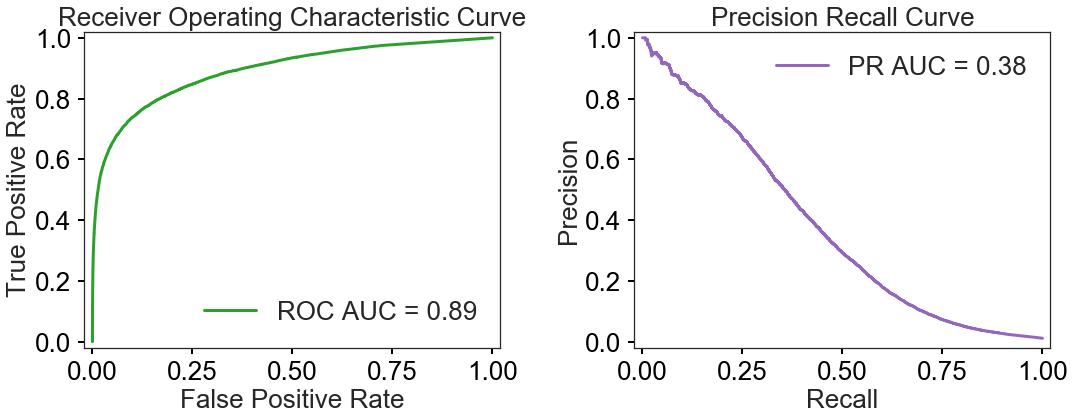

In [44]:
plots(ET, X_test4, y_test4, outputfile='../Report/ET_ROC_PR_plots.pdf')

In [45]:
y_pred_test_prob4 = ET.predict_proba(X_test4)

In [46]:
del df4
del X4
del X_train4
del X_test4

# Plotting ROC and PR curves for all models together

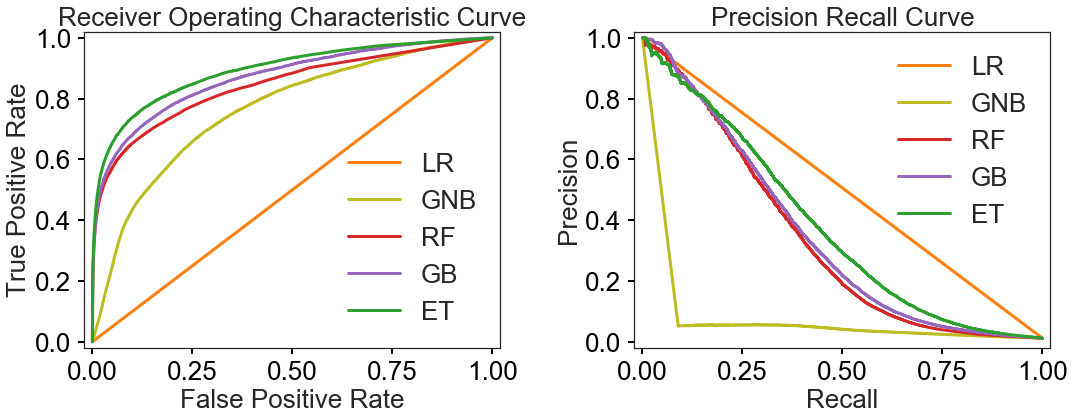

In [52]:
fs = 26
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
# ROC
ax1 = plt.subplot(1, 2, 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
ax1.plot(fpr, tpr, lw=1, label='LR', color=tableau20[2], linewidth=3)
fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_pred_test_prob1[:, 1])
ax1.plot(fpr1, tpr1, lw=1, label='GNB', color=tableau20[16], linewidth=3)
fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_pred_test_prob2[:, 1])
ax1.plot(fpr2, tpr2, lw=1, label='RF', color=tableau20[6], linewidth=3)
fpr3, tpr3, thresholds3 = roc_curve(y_test3, y_pred_test_prob3[:, 1])
ax1.plot(fpr3, tpr3, lw=1, label='GB', color=tableau20[8], linewidth=3)
fpr4, tpr4, thresholds4 = roc_curve(y_test4, y_pred_test_prob4[:, 1])
ax1.plot(fpr4, tpr4, lw=1, label='ET', color=tableau20[4], linewidth=3)
ax1.set_xlim([-0.02, 1.02])
ax1.set_ylim([-0.02, 1.02])
ax1.set_xlabel('False Positive Rate', size=fs)
ax1.set_ylabel('True Positive Rate', size=fs)
ax1.set_title('Receiver Operating Characteristic Curve', size=fs)
ax1.tick_params(direction='out', length=6, width=2, colors='k', labelsize=fs)
ax1.legend(loc="lower right", fontsize=fs)
    
#PR
ax2 = plt.subplot(1, 2, 2)
prec, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob[:, 1])
ax2.plot(recall, prec, lw=1, label='LR', color=tableau20[2], linewidth=3)    
prec1, recall1, thresholds1 = precision_recall_curve(y_test1, y_pred_test_prob1[:, 1])
ax2.plot(recall1, prec1, lw=1, label='GNB', color=tableau20[16], linewidth=3)
prec2, recall2, thresholds2 = precision_recall_curve(y_test2, y_pred_test_prob2[:, 1])
ax2.plot(recall2, prec2, lw=1, label='RF', color=tableau20[6], linewidth=3)
prec3, recall3, thresholds3 = precision_recall_curve(y_test3, y_pred_test_prob3[:, 1])
ax2.plot(recall3, prec3, lw=1, label='GB', color=tableau20[8], linewidth=3)
prec4, recall4, thresholds4 = precision_recall_curve(y_test4, y_pred_test_prob4[:, 1])
ax2.plot(recall4, prec4, lw=1, label='ET', color=tableau20[4], linewidth=3)    
ax2.set_xlim([-0.02, 1.02])
ax2.set_ylim([-0.02, 1.02])
ax2.set_xlabel('Recall', size=fs)
ax2.set_ylabel('Precision', size=fs)
ax2.set_title('Precision Recall Curve', size=fs)
ax2.tick_params(direction='out', length=6, width=2, colors='k', labelsize=fs)
ax2.legend(loc="top right", fontsize=fs)
    
plt.tight_layout()
savefig('../Report/AllModels_ROC_PR_plots.pdf')

## Function to plot ROC and PR curves

In [45]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
def plots(model, X_test, y_test, outputfile):
    """ This function plots the ROC and PR curves for a given classifier and test data.
    
    Parameters
    ----------
    model (dtype: sklearn.model_selection._search.GridSearchCV) : The classifier model
    """
    y_pred_test_prob = model.predict_proba(X_test)
    fs = 26
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
    
    # ROC
    ax1 = plt.subplot(1, 2, 1)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, lw=1, label='ROC AUC = %0.2f' % (roc_auc), color=tableau20[4], linewidth=3)    
    ax1.set_xlim([-0.02, 1.02])
    ax1.set_ylim([-0.02, 1.02])
    ax1.set_xlabel('False Positive Rate', size=fs)
    ax1.set_ylabel('True Positive Rate', size=fs)
    ax1.set_title('Receiver Operating Characteristic Curve', size=fs)
    ax1.tick_params(direction='out', length=6, width=2, colors='k', labelsize=fs)
    ax1.legend(loc="lower right", fontsize=fs)
    
    #PR
    ax2 = plt.subplot(1, 2, 2)
    prec, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob[:, 1])
    ax2.plot(recall, prec, lw=1, label='PR AUC = %0.2f' % 
             (metrics.average_precision_score(y_test, y_pred_test_prob[:, 1])), color=tableau20[8], linewidth=3)    
    ax2.set_xlim([-0.02, 1.02])
    ax2.set_ylim([-0.02, 1.02])
    ax2.set_xlabel('Recall', size=fs)
    ax2.set_ylabel('Precision', size=fs)
    ax2.set_title('Precision Recall Curve', size=fs)
    ax2.tick_params(direction='out', length=6, width=2, colors='k', labelsize=fs)
    ax2.legend(loc="top right", fontsize=fs)
    
    plt.tight_layout()
    savefig(outputfile)